In [1]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
# pandas-datareaderをインストールしていない場合は、事前にインストールが必要
import pandas_datareader.data as web

In [2]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa import arima_model

In [3]:
# ニューヨーク取引所におけるSony Corp(SNE)の10か月分の日時データを取得
# 1月1日, 1月2日は取引所の休業日のためデータがない
st = datetime(2017, 1, 1)
end = datetime(2017, 10, 31)

y = web.DataReader('SNE', 'yahoo', start=st, end=end)

In [4]:
y.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,28.320000,28.040001,28.100000,28.290001,894900.0,27.862141
2017-01-04,28.660000,28.420000,28.480000,28.580000,910500.0,28.147753
2017-01-05,28.790001,28.430000,28.540001,28.719999,1027500.0,28.285635
2017-01-06,29.040001,28.530001,28.570000,28.959999,964800.0,28.522007
2017-01-09,28.950001,28.740000,28.740000,28.820000,648700.0,28.384127


In [5]:
x_factor = np.random.randn(len(y)).cumsum()

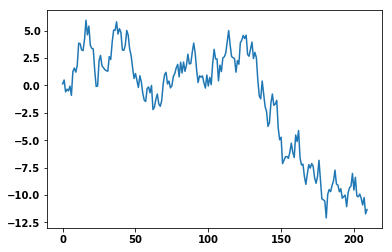

In [6]:
plt.plot(x_factor)

In [7]:
# x_factorのADF検定
# 当然単位根過程となる
# トレンド項あり（2次まで）、定数項あり
ctt = stattools.adfuller(x_factor, regression="ctt")
# トレンド項あり（1次）、定数項あり
ct = stattools.adfuller(x_factor, regression="ct")
# トレンド項なし、定数項あり
c = stattools.adfuller(x_factor, regression="c")
# トレンド項なし、定数項なし
nc = stattools.adfuller(x_factor, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-3.276140248692092, 0.18055268521654616, 0, 209, {'1%': -4.4274325368239005, '5%': -3.860945830959756, '10%': -3.5708981838796694}, 548.2149334388492)
ct:
(-2.578802328098802, 0.28974534760725545, 0, 209, {'1%': -4.0027517721652925, '5%': -3.4317085320958416, '10%': -3.139513599307244}, 550.8496330199099)
c:
(-0.7802896890497649, 0.824843373790451, 0, 209, {'1%': -3.4620315036789666, '5%': -2.8754705024827127, '10%': -2.5741950726860647}, 553.8238810464757)
nc:
(-0.5437474331701213, 0.47806007973947223, 0, 209, {'1%': -2.576520641468831, '5%': -1.942358783170154, '10%': -1.6156085405816791}, 553.6246793325887)


In [8]:
# y.CloseのADF検定
# 当然単位根過程となる
# トレンド項あり（2次まで）、定数項あり
ctt = stattools.adfuller(y.Close, regression="ctt")
# トレンド項あり（1次）、定数項あり
ct = stattools.adfuller(y.Close, regression="ct")
# トレンド項なし、定数項あり
c = stattools.adfuller(y.Close, regression="c")
# トレンド項なし、定数項なし
nc = stattools.adfuller(y.Close, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-1.7430362995575495, 0.8977245289316549, 1, 208, {'1%': -4.42770753779568, '5%': -3.8610846253947146, '10%': -3.5709836356350633}, 306.4008588489894)
ct:
(-2.2025964663907316, 0.4883892677298745, 1, 208, {'1%': -4.002966509244673, '5%': -3.43181159172131, '10%': -3.139573978276485}, 304.6027052661152)
c:
(-0.8138677943630335, 0.8150145292024813, 1, 208, {'1%': -3.4621857592784546, '5%': -2.875537986778846, '10%': -2.574231080806213}, 306.56290529746735)
nc:
(1.676139794011456, 0.9776209940954025, 1, 208, {'1%': -2.5765728725961536, '5%': -1.942365654803603, '10%': -1.615602989499175}, 305.0634077469417)


In [9]:
from statsmodels.api import OLS

model = OLS(y.Close, x_factor)
results = model.fit()

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     23.30
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           2.68e-06
Time:                        13:40:26   Log-Likelihood:                -1037.7
No. Observations:                 210   AIC:                             2077.
Df Residuals:                     209   BIC:                             2081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.2013      0.456     -4.827      0.000      -3.100      -1.302
==============================================================================
Omnibus:                       22.013   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.117
Skew:                          -0.500   Prob(JB):                     0.000860
Kurtosis:                       2.216   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""